In [5]:
import h5py
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt

from reproducibility.utils import data_sample, data_preprocess, set_seed
from scace import run_scace

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300 # set global dpi

## Data Preprocessing

In [6]:
####################################  Read dataset  ####################################
# This data could be downloaded from https://drive.google.com/drive/folders/1c33An3HNdJQhazoy_ky9E-lCc3a4y7fl
data_mat = h5py.File('/Users/jiayi_liu/Desktop/scAce-notes/reproducibility/data/Human_p.h5')
x, y = np.array(data_mat['X']), np.array(data_mat['Y'])
data_mat.close()

####################################  Run without sampling  ####################################

seed = 2023
set_seed(seed)

adata = sc.AnnData(x)
adata.obs['celltype'] = y

adata = data_preprocess(adata)

In [7]:
adata

AnnData object with n_obs × n_vars = 3605 × 15228
    obs: 'celltype', 'n_genes', 'n_counts', 'scale_factor'
    var: 'n_cells', 'mean', 'std'
    uns: 'log1p'

## Run scAce

In default mode, function `run_scace` would return an AnnData object with embedding and clustering result stored in `adata.obsm['scace_emb']` and `adata.obs['scace_cluster']`

In [6]:
# adata = run_scace(adata)

If return_all is True, function `run_scace` would print and return all temporate results:

- K: Final number of clusters.
- pred_all: All temporary clustering results.
- emb_all: All temporary embedding.


In [7]:
# adata, K, pred_all, emb_all, run_time = run_scace(adata, return_all=True)

If the key of grount truth cell type (i.e. `cl_type`) is also provided, ARI and NMI will also be returned.

In [8]:
adata, nmi, ari, K, pred_all, emb_all, run_time = run_scace(
    adata,
    cl_type='celltype',
    return_all=True,
    pretrained_ckpt='/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_hp.pth'
)

Pre-trained model provided, load checkpoint from file "/Users/jiayi_liu/Desktop/scAce-notes/pretraining/scace_hp.pth".
Perform initial clustering through leiden with resolution = 2
Finish initial clustering! Number of initial clusters is 28
Initial Clustering: NMI= 0.6752, ARI= 0.3067
Start training! Total epochs is 500.


Training::   0%|                                     | 0/500 [00:00<?, ?epoch/s]

Train epoch [1/500]. ZINB loss:0.3470, kld loss:11.8091, cluster loss:0.5276, total loss:0.9927


Training::   0%|                           | 1/500 [00:29<4:03:25, 29.27s/epoch]

Clustering   1: NMI= 0.6731, ARI= 0.3054, Delta=0.1309
Train epoch [2/500]. ZINB loss:0.3466, kld loss:17.0233, cluster loss:0.4766, total loss:0.9935


Training::   0%|                           | 2/500 [00:59<4:06:19, 29.68s/epoch]

Clustering   2: NMI= 0.6762, ARI= 0.3085, Delta=0.0902
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 27
count_true: 351
count: 335
-----------------iter: 2-----------------
n_clusters: 26
count_true: 325
count: 310
-----------------iter: 3-----------------
n_clusters: 25
count_true: 300
count: 292
-----------------iter: 4-----------------
n_clusters: 24
count_true: 276
count: 269
-----------------iter: 5-----------------
n_clusters: 23
count_true: 253
count: 247
-----------------iter: 6-----------------
n_clusters: 22
count_true: 231
count: 226
-----------------iter: 7-----------------
n_clusters: 21
count_true: 210
count: 207
-----------------iter: 8-----------------
n_clusters: 20
count_true: 190
count: 184
-----------------iter: 9-----------------
n_clusters: 19
count_true: 171
count: 169
-----------------iter: 10-----------------
n_clusters: 18
count_true: 153
count: 149
-----------------iter: 11-----------------
n_cluster

Training::   1%|▏                          | 3/500 [01:32<4:21:17, 31.54s/epoch]

Clustering   3: NMI= 0.7676, ARI= 0.5587, Delta=0.0424
Train epoch [4/500]. ZINB loss:0.3480, kld loss:30.5248, cluster loss:0.4839, total loss:1.1371


Training::   1%|▏                          | 4/500 [02:05<4:25:06, 32.07s/epoch]

Clustering   4: NMI= 0.7685, ARI= 0.5617, Delta=0.7626
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 13
count_true: 78
count: 74
-----------------iter: 2-----------------
n_clusters: 12
count_true: 66
count: 61
-----------------iter: 3-----------------
n_clusters: 11
count_true: 55
count: 53
-----------------iter: 4-----------------
n_clusters: 10
count_true: 45
count: 44
-----------------iter: 5-----------------
n_clusters: 9
count_true: 36
count: 36
Reach count!
Train epoch [5/500]. ZINB loss:0.3452, kld loss:33.3238, cluster loss:0.4091, total loss:1.0875


Training::   1%|▎                          | 5/500 [02:50<5:00:56, 36.48s/epoch]

Clustering   5: NMI= 0.8162, ARI= 0.7797, Delta=0.0272
Train epoch [6/500]. ZINB loss:0.3460, kld loss:34.6433, cluster loss:0.4258, total loss:1.1182


Training::   1%|▎                          | 6/500 [03:25<4:58:16, 36.23s/epoch]

Clustering   6: NMI= 0.8164, ARI= 0.7787, Delta=0.3761
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 8
count_true: 28
count: 25
-----------------iter: 2-----------------
n_clusters: 7
count_true: 21
count: 19
-----------------iter: 3-----------------
n_clusters: 6
count_true: 15
count: 14
-----------------iter: 4-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Train epoch [7/500]. ZINB loss:0.3499, kld loss:32.3976, cluster loss:0.2937, total loss:0.9676


Training::   1%|▍                          | 7/500 [04:07<5:10:54, 37.84s/epoch]

Clustering   7: NMI= 0.8734, ARI= 0.8935, Delta=0.0055
Train epoch [8/500]. ZINB loss:0.3518, kld loss:30.4819, cluster loss:0.3308, total loss:0.9874


Training::   2%|▍                          | 8/500 [04:35<4:45:23, 34.80s/epoch]

Clustering   8: NMI= 0.8736, ARI= 0.8938, Delta=0.3501
Reach tolerance threshold. Perform cluster merging.
-----------------iter: 1-----------------
n_clusters: 5
count_true: 10
count: 10
Reach count!
Stop merging clusters! Continue updating several rounds.
Train epoch [9/500]. ZINB loss:0.3495, kld loss:32.4387, cluster loss:0.3137, total loss:0.9876


Training::   2%|▍                          | 9/500 [05:07<4:39:32, 34.16s/epoch]

Clustering   9: NMI= 0.8746, ARI= 0.8944, Delta=0.0008
Reach tolerance threshold. Stopping training.
Total time: 320.36190390586853 seconds


In [9]:
print("ARI = {}, NMI = {}".format(ari, nmi))

ARI = 0.89438, NMI = 0.87459


## Visualization

### Show final clustering results

In [10]:
# Use embedding `scace_emb` to perfrom U-map
sc.pp.neighbors(adata, use_rep='scace_emb')
sc.tl.umap(adata)

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


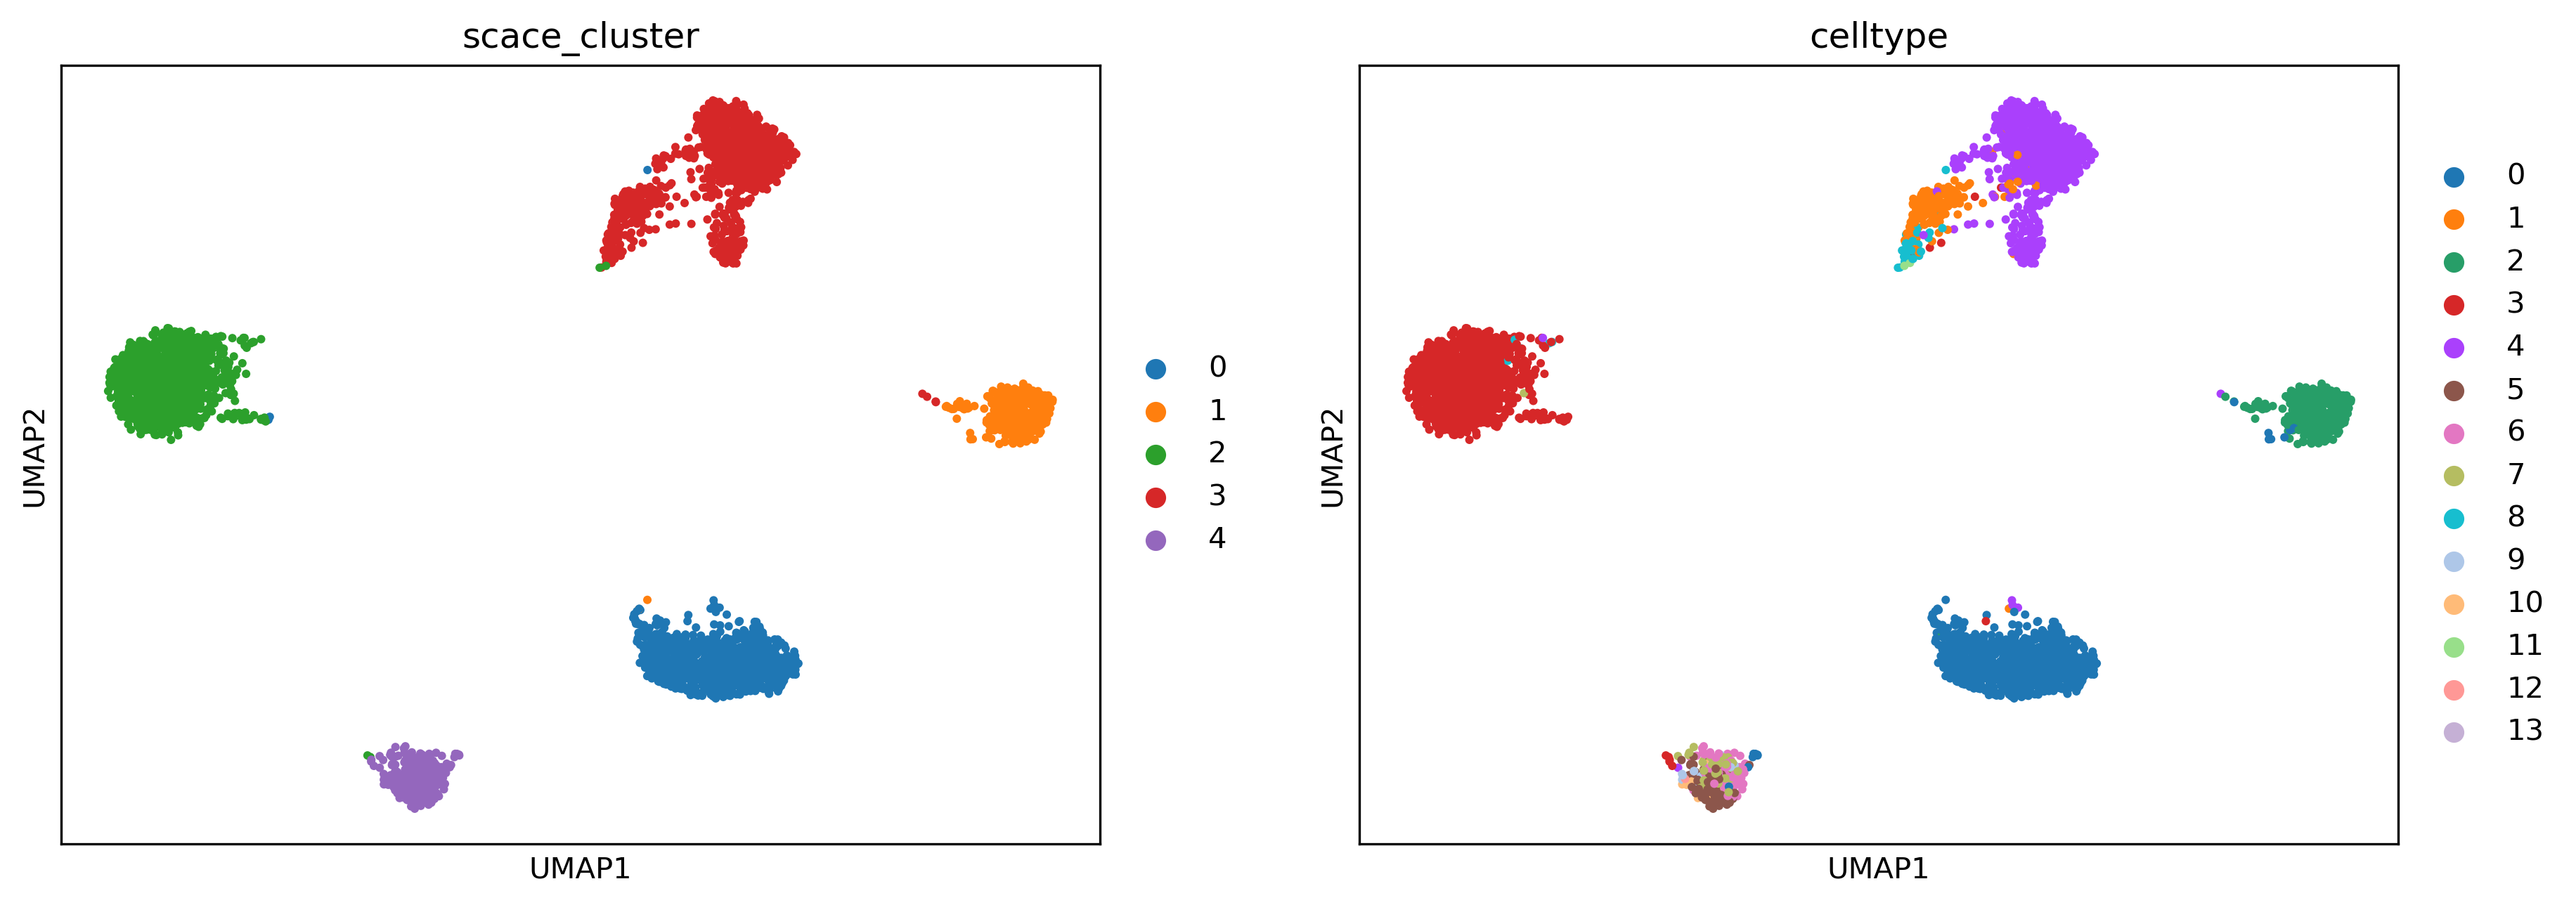

In [11]:
adata.obs['celltype'] = adata.obs['celltype'].astype(int).astype('category')
adata.obs['scace_cluster'] = adata.obs['scace_cluster'].astype(int).astype('category')
sc.pl.umap(adata, color=['scace_cluster', 'celltype'])

### Show initial clustering results

In [12]:
# emb_all[0] is the embedding after pre-training
# pred_all[0] is the initial clustering result after pre-training

adata_tmp = sc.AnnData(emb_all[0])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_cluster'] = pred_all[0]
adata_tmp.obs['scace_cluster'] = adata_tmp.obs['scace_cluster'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


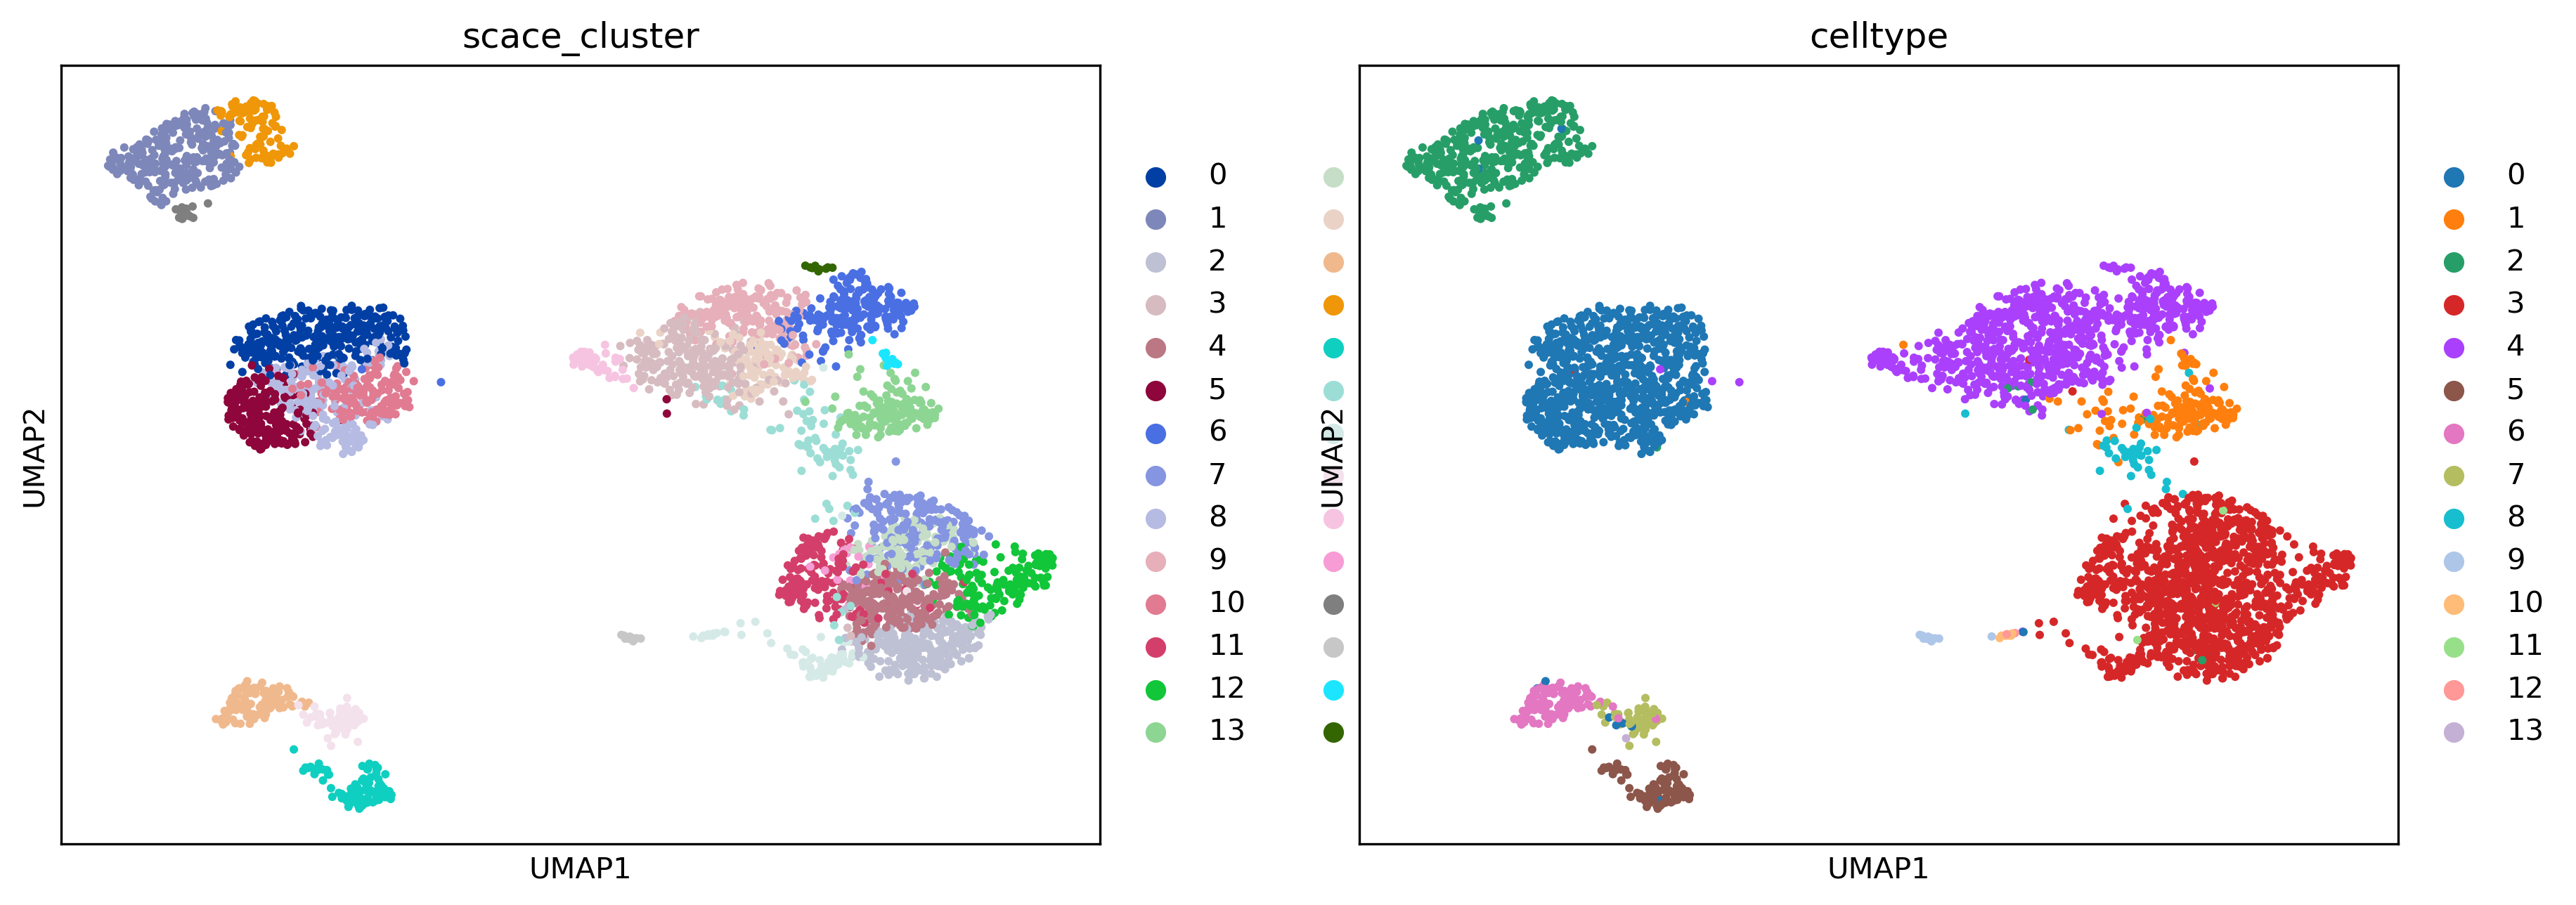

In [13]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_cluster', 'celltype'])

### Show clustering results before and after cluster merging

For the first time

In [14]:
# emb_all[1] is the embedding of the first cluster merging.
# pred_all[1] is the all clustering results from the first cluster merging, where
# pred_all[1][0] is the clustering result before cluster merging, and
# pred_all[1][0] is the clustering result after cluster merging.

adata_tmp = sc.AnnData(emb_all[1])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[1][0], pred_all[1][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


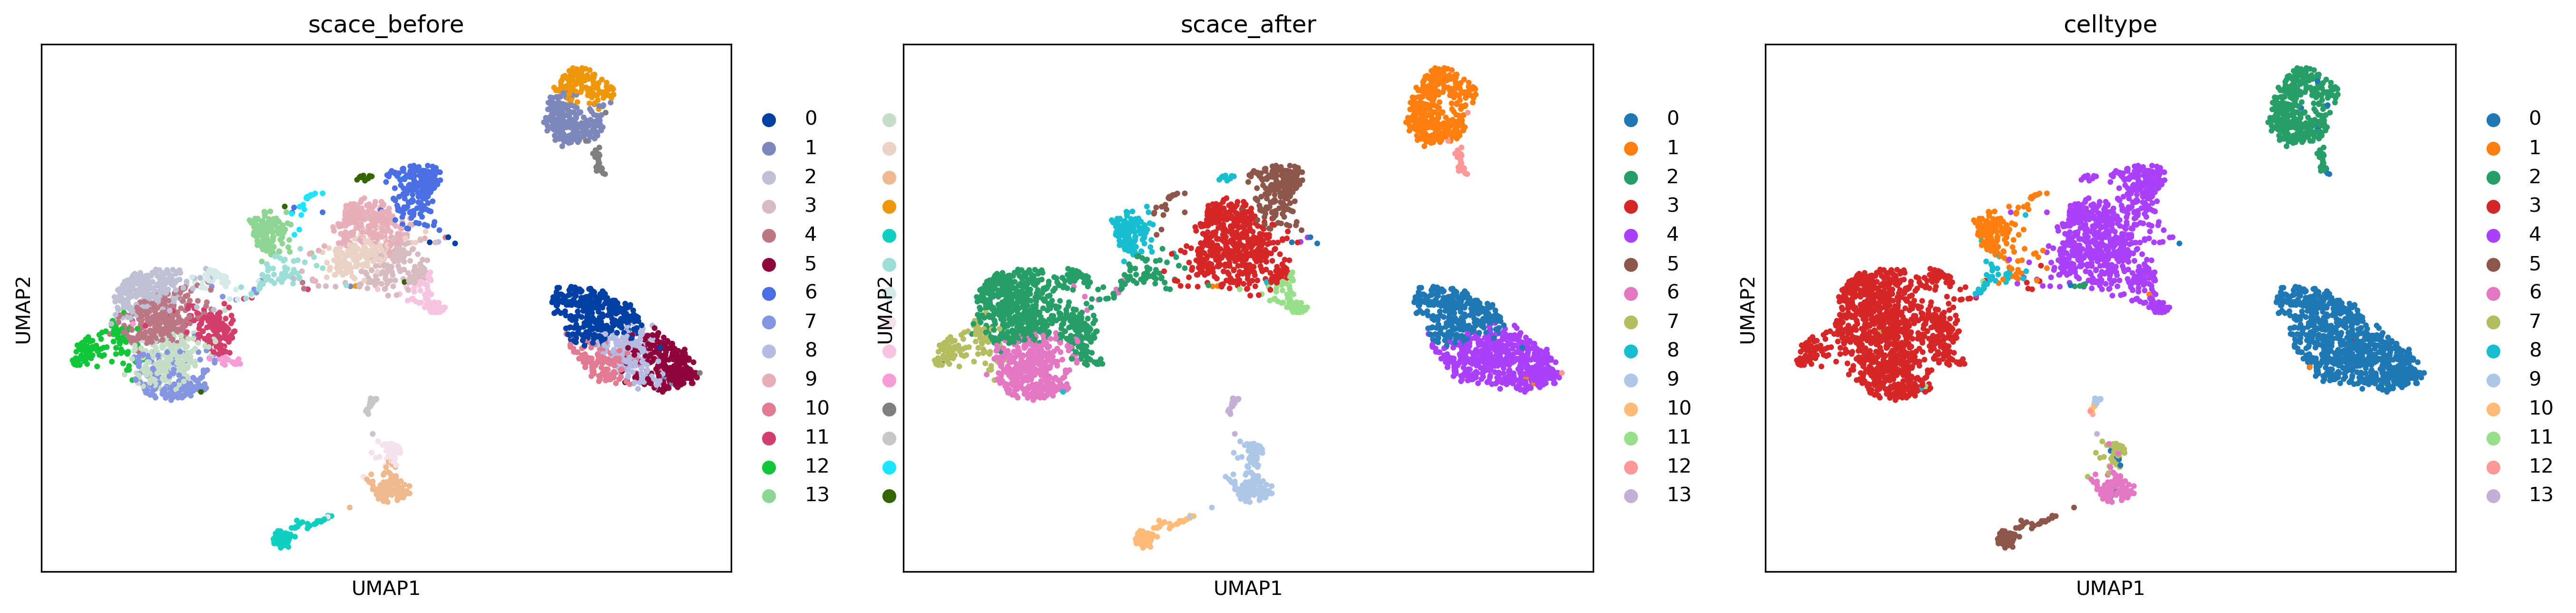

In [15]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])

For the final time

In [16]:
adata_tmp = sc.AnnData(emb_all[-2])
adata_tmp.obs['celltype'] = adata.obs['celltype']
adata_tmp.obs['scace_before'], adata_tmp.obs['scace_after'] = pred_all[2][0], pred_all[2][-1]
adata_tmp.obs['scace_before'] = adata_tmp.obs['scace_before'].astype(int).astype('category')
adata_tmp.obs['scace_after'] = adata_tmp.obs['scace_after'].astype(int).astype('category')

/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/jiayi_liu/anaconda3/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


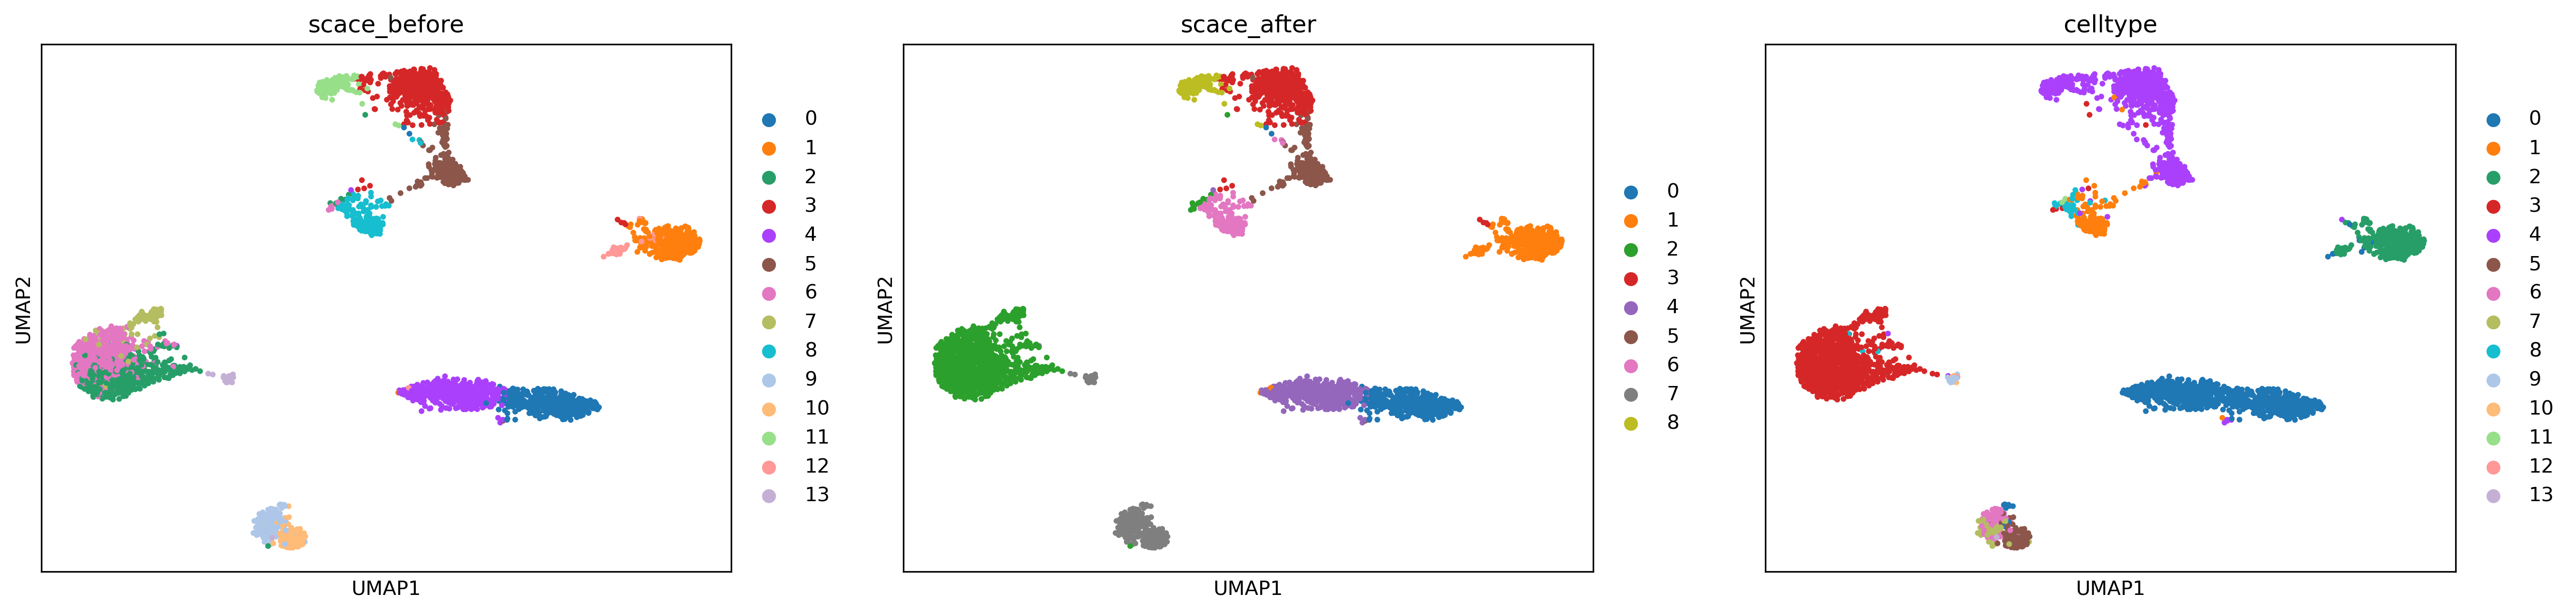

In [17]:
sc.pp.neighbors(adata_tmp)
sc.tl.umap(adata_tmp)
sc.pl.umap(adata_tmp, color=['scace_before', 'scace_after', 'celltype'])